#### Os dados, até a data do presente estudo, estão no https://covid.saude.gov.br/
#### O presente arquivo é de domingo, 07 de julho. Atenção: de acordo com o dia em que for feita a análise, a última barra da totalização por semana estará menor.
#### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\Daniel\HIST_PAINEL_COVIDBR_09jul2020.xlsx'
df = pd.read_excel(filename)

In [3]:
df.shape

(574483, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574483 entries, 0 to 574482
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   regiao                  574483 non-null  object        
 1   estado                  574347 non-null  object        
 2   municipio               568470 non-null  object        
 3   coduf                   574483 non-null  int64         
 4   codmun                  570675 non-null  float64       
 5   codRegiaoSaude          568470 non-null  float64       
 6   nomeRegiaoSaude         568470 non-null  object        
 7   data                    574483 non-null  datetime64[ns]
 8   semanaEpi               574483 non-null  int64         
 9   populacaoTCU2019        572278 non-null  object        
 10  casosAcumulado          574483 non-null  int64         
 11  casosNovos              574483 non-null  int64         
 12  obitosAcumulado         574483

In [5]:
df.sample(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
382538,Sudeste,SP,Narandiba,35,353220.0,35112.0,ALTA SOROCABANA,2020-07-05,28,4857,0,0,0,0,NaN,NaN,0.0
173243,Nordeste,PE,Moreilândia,26,261430.0,26007.0,OURICURI,2020-06-05,23,11270,2,0,0,0,NaN,NaN,0.0
233779,Nordeste,BA,Tanhaçu,29,293100.0,29003.0,BRUMADO,2020-04-17,16,20403,0,0,0,0,NaN,NaN,0.0
377438,Sudeste,SP,Lupércio,35,352780.0,35093.0,MARILIA,2020-05-06,19,4584,0,0,0,0,NaN,NaN,0.0
242262,Sudeste,MG,Arcos,31,310420.0,31087.0,LAGOA DA PRATA/STO ANT DO MONTE,2020-07-09,28,40092,66,3,1,0,NaN,NaN,0.0
446964,Sul,PR,São Tomé,41,412610.0,41013.0,13ª RS CIANORTE,2020-05-22,21,5722,0,0,0,0,NaN,NaN,0.0
287635,Sudeste,MG,Medina,31,314140.0,31065.0,ITAOBIM,2020-04-08,15,20820,0,0,0,0,NaN,NaN,0.0
342555,Sudeste,RJ,Santa Maria Madalena,33,330460.0,33009.0,SERRANA,2020-04-13,16,10404,0,0,0,0,NaN,NaN,0.0
220544,Nordeste,BA,Medeiros Neto,29,292110.0,29026.0,TEIXEIRA DE FREITAS,2020-04-12,16,22688,1,0,0,0,NaN,NaN,0.0
160631,Nordeste,PE,Carnaíba,26,260390.0,26001.0,AFOGADOS DA INGAZEIRA,2020-05-24,22,19551,9,1,4,0,NaN,NaN,0.0


In [6]:
df.groupby('estado')['obitosAcumulado'].max().sort_values(ascending=False)

estado
SP    17118
RJ    11115
CE     6741
PE     5409
PA     5196
AM     2985
MA     2357
BA     2328
ES     1930
MG     1445
RN     1345
AL     1230
PB     1196
PR      931
MT      928
SE      901
PI      884
RS      870
DF      823
GO      769
RO      589
AP      467
SC      447
AC      411
RR      393
TO      240
MS      136
Name: obitosAcumulado, dtype: int64

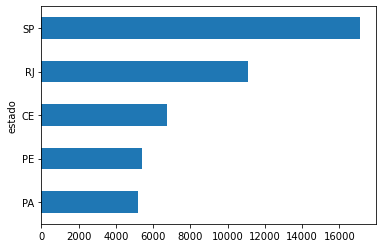

In [58]:
df.groupby('estado')['obitosAcumulado'].max().sort_values().tail(5).plot(kind='barh')

In [8]:
df['data'] = df['data'].dt.strftime('%d/%m')

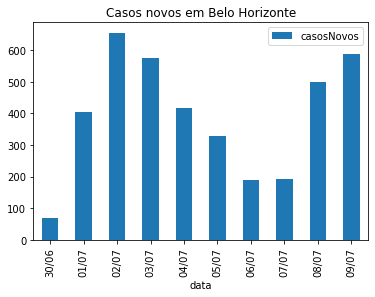

In [42]:
sp = df.query('municipio == "Belo Horizonte"')
sp.tail(10).plot(kind='bar', title = 'Casos novos em Belo Horizonte',
        x='data', y='casosNovos')

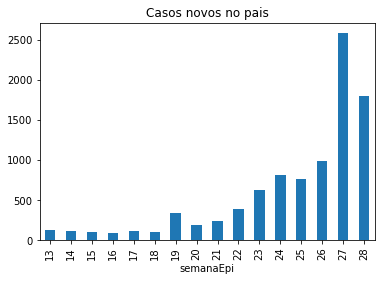

In [41]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar',title = 'Casos novos no pais')

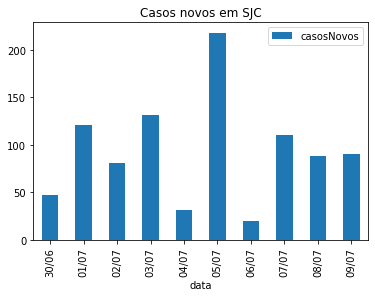

In [44]:
sjc = df.query('municipio == "São José dos Campos"')
sjc.tail(10).plot(kind='bar', title = 'Casos novos em SJC',
        x='data', y='casosNovos')

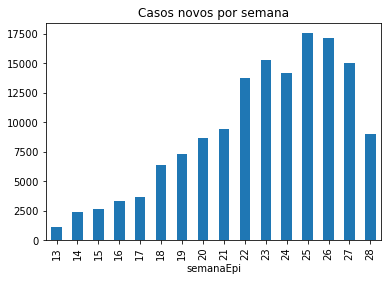

In [35]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar',title = 'Casos novos por semana')

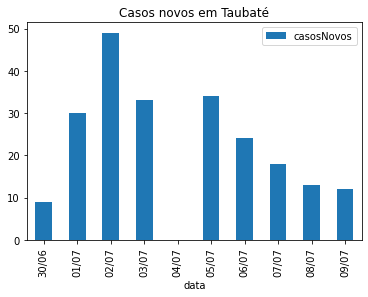

In [57]:
sjc = df.query('municipio == "Taubaté"')
sjc.tail(10).plot(kind='bar', title = 'Casos novos em Taubaté',
        x='data', y='casosNovos')